# IMDB movies Web Scraper

The aim of this project is to find the best movies to watch for a person who wants to get more knowledgeable in the art of cinematography.

Recently, I decided to get more into cinematography, after realising my movie knowledge was poor, having never watched classic movies like Star Wars, The Godfather, Back to the Future etc. I decided to make a list of the best and most influential movies that not only will provide a good understanding of the development of cinematography throughout the years, but are also fun and entertaining to watch.

We are going to scrape IMDB's Top 250 movies list which is a list of the top-rated movies on the popular movie database website IMDb (Internet Movie Database). This top is determined by the ratings given by IMDb users and is considered a measure of the general public's opinion on the best movies of all time.

In addition to the ratings, we are also considering:
- The length of the movie (shorter movies are prefered)
- The number of votes (more votes mean more popularity and influence they have)
- Release year (older movies may feel less entertaining in today's time, for example due to poorer special effect)
- Actors and directors to find which people have made the most impact in the industry
- Genre (to be able to filter the movies based on the genre we feel like watching at a particular time)

We'll create a CSV file in the following format:

Rank,Title,Rating,Year,URL,Number of votes,Description,Duration,Genre,Director,Writer,Top 10 actors

Then we will use this information to create charts which help us answer some questions like which decade has created the most influential movies, what are the top actors, what genre the public prefers etc.

## Scraping the list of movies

First, we will use requests to download the page, then use BeautifulSoup to parse and extract the needed information and lastly we convert to a Pandas dataframe.

We import the necessary libraries, then we create separate functions for each instruction such as:
- Get movies page
- Get page header
- Get list of movie titles
- Get list of release years
- Get list of movie URLs
- Create a list of ranks
- Putting everything together in one function

In [680]:
from bs4 import BeautifulSoup
import requests
import smtplib
import time
import datetime
import pandas as pd
import os
import csv
import re

In [475]:
def get_movies_page():
    main_url = 'https://www.imdb.com/chart/top/'
    response = requests.get(main_url)
    if response.status_code < 200 or response.status_code > 299:
        raise Exception('Failed to load movies page {}'.format(main.url))
    # Parse using Beautiful soup
    doc = BeautifulSoup(response.text, 'html.parser')
    #page_contents = response.text
    return doc

In [753]:
# Example
doc = get_movies_page()
#print(doc.prettify())

In [682]:
def get_page_header(doc):
    h1_tags = doc.find('h1', class_='header')
    header = h1_tags
    return header

In [683]:
# Example
header = get_page_header(doc)
print(header.string)

IMDb Top 250 Movies


In [684]:
def get_list_of_movie_titles(doc):
    list_of_movie_titles = []
    title = doc.find_all(class_='titleColumn')
    for i in title:
        # Searching for the 'a' tags in the 'titleColumn' class to find the movie titles
        q = i.find_all('a')
        for i in q:
            list_of_movie_titles.append(i.text)
    return list_of_movie_titles

In [685]:
# Example
titles = get_list_of_movie_titles(doc)
print(titles)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', '12 Angry Men', "Schindler's List", 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', 'The Lord of the Rings: The Fellowship of the Ring', 'The Good, the Bad and the Ugly', 'Spider-Man: Across the Spider-Verse', 'Forrest Gump', 'Fight Club', 'The Lord of the Rings: The Two Towers', 'Inception', 'Star Wars: Episode V - The Empire Strikes Back', 'The Matrix', 'GoodFellas', "One Flew Over the Cuckoo's Nest", 'Seven', "It's a Wonderful Life", 'Seven Samurai', 'The Silence of the Lambs', 'Saving Private Ryan', 'City of God', 'Interstellar', 'Life Is Beautiful', 'The Green Mile', 'Star Wars: Episode IV - A New Hope', 'Terminator 2: Judgment Day', 'Back to the Future', 'Spirited Away', 'The Pianist', 'Psycho', 'Parasite', 'Leon', 'The Lion King', 'Gladiator', 'American History X', 'The Departed', 'Whiplash', 'The Prestige', 'The Usual Suspects', 'Casablanca', 'Grave of the Fireflies', 'Har

In [686]:
def get_list_of_movie_ratings(doc):
    list_of_ratings = []
    ratings = doc.find_all(class_='ratingColumn imdbRating')
    for i in ratings:
        i = i.text
        list_of_ratings.append(float(i[1:-1]))
    return list_of_ratings

In [687]:
# Example
list_of_movie_ratings = get_list_of_movie_ratings(doc)
print(list_of_movie_ratings)

[9.2, 9.2, 9.0, 9.0, 9.0, 8.9, 8.9, 8.8, 8.8, 8.8, 8.8, 8.8, 8.7, 8.7, 8.7, 8.7, 8.7, 8.7, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1,

In [688]:
def get_list_of_movie_years(doc):
    list_of_movie_years = []
    years = doc.find_all(class_='secondaryInfo')
    for i in years:
        i = i.text
        list_of_movie_years.append(int(i[1:-1]))
    return list_of_movie_years

In [689]:
# Example
list_of_movie_years = get_list_of_movie_years(doc)
print(list_of_movie_years)

[1994, 1972, 2008, 1974, 1957, 1993, 2003, 1994, 2001, 1966, 2023, 1994, 1999, 2002, 2010, 1980, 1999, 1990, 1975, 1995, 1946, 1954, 1991, 1998, 2002, 2014, 1997, 1999, 1977, 1991, 1985, 2001, 2002, 1960, 2019, 1994, 1994, 2000, 1998, 2006, 2014, 2006, 1995, 1942, 1988, 1962, 2011, 1936, 1968, 1988, 1954, 1979, 1931, 1979, 2000, 2012, 1981, 2008, 2006, 1950, 1957, 2018, 1980, 1940, 1957, 2018, 1986, 1999, 2012, 1964, 2009, 2003, 2017, 1984, 1995, 1995, 1981, 2019, 2019, 1997, 1997, 1984, 2016, 2009, 1952, 1963, 2000, 2018, 2010, 1983, 1985, 2004, 1968, 2012, 1992, 1962, 1941, 1931, 1952, 1959, 1960, 1958, 2001, 1944, 1971, 1987, 2020, 1983, 2010, 1995, 2009, 1962, 1973, 2011, 1927, 1997, 1988, 1989, 2000, 1976, 1948, 2007, 2019, 2016, 2004, 2022, 1965, 2005, 1921, 1959, 2020, 2013, 1950, 2018, 1961, 1985, 1998, 1995, 2007, 2006, 1992, 2010, 1999, 1993, 2001, 1948, 1961, 1975, 2007, 2003, 1963, 1950, 1982, 2003, 2021, 1980, 1974, 1980, 2005, 1939, 1954, 2015, 1998, 2004, 2009, 2017, 202

In [690]:
def get_list_of_movie_urls(doc):
    list_of_urls = []
    # Here we create a base URL to which we attach the 'href' to create the full link to each movie
    base_url = 'https://imdb.com'
    title = doc.find_all(class_='titleColumn')
    for i in title:
        q = i.find_all('a')
        for i in q:
            list_of_urls.append(base_url + i.get('href'))
    return list_of_urls

In [691]:
# Example
list_of_movie_urls = get_list_of_movie_urls(doc)
print(list_of_movie_urls)

['https://imdb.com/title/tt0111161/', 'https://imdb.com/title/tt0068646/', 'https://imdb.com/title/tt0468569/', 'https://imdb.com/title/tt0071562/', 'https://imdb.com/title/tt0050083/', 'https://imdb.com/title/tt0108052/', 'https://imdb.com/title/tt0167260/', 'https://imdb.com/title/tt0110912/', 'https://imdb.com/title/tt0120737/', 'https://imdb.com/title/tt0060196/', 'https://imdb.com/title/tt9362722/', 'https://imdb.com/title/tt0109830/', 'https://imdb.com/title/tt0137523/', 'https://imdb.com/title/tt0167261/', 'https://imdb.com/title/tt1375666/', 'https://imdb.com/title/tt0080684/', 'https://imdb.com/title/tt0133093/', 'https://imdb.com/title/tt0099685/', 'https://imdb.com/title/tt0073486/', 'https://imdb.com/title/tt0114369/', 'https://imdb.com/title/tt0038650/', 'https://imdb.com/title/tt0047478/', 'https://imdb.com/title/tt0102926/', 'https://imdb.com/title/tt0120815/', 'https://imdb.com/title/tt0317248/', 'https://imdb.com/title/tt0816692/', 'https://imdb.com/title/tt0118799/', 

In [692]:
# Simple function which creates a list of ranks to be associated which the movie information
def create_list_of_ranks():
    rank = []
    for i in range(250):
        rank.append(i+1)
    return rank

In [693]:
# Example
ranks = create_list_of_ranks()
print(ranks)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [694]:
# Putting everything together
def scrape_top_250():
    movies_url = 'https://www.imdb.com/chart/top/'
    # Download the page
    response = requests.get(movies_url)
    # Check successful response
    if response.status_code < 200 or response.status_code > 299:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    movies_dict = {
        'rank': create_list_of_ranks(),
        'title': get_list_of_movie_titles(doc),
        'rating': get_list_of_movie_ratings(doc),
        'year': get_list_of_movie_years(doc),
        'url': get_list_of_movie_urls(doc),
        
    }
    return movies_dict

In [695]:
# Display as Panda DataFrame
top250 = pd.DataFrame(scrape_top_250())
top250

,rank,title,rating,year,url
0,1,The Shawshank Redemption,9.2,1994,https://imdb.com/title/tt0111161/
1,2,The Godfather,9.2,1972,https://imdb.com/title/tt0068646/
2,3,The Dark Knight,9.0,2008,https://imdb.com/title/tt0468569/
3,4,The Godfather Part II,9.0,1974,https://imdb.com/title/tt0071562/
4,5,12 Angry Men,9.0,1957,https://imdb.com/title/tt0050083/
...,...,...,...,...,...
245,246,The Help,8.0,2011,https://imdb.com/title/tt1454029/
246,247,The Iron Giant,8.0,1999,https://imdb.com/title/tt0129167/
247,248,Life of Brian,8.0,1979,https://imdb.com/title/tt0079470/
248,249,Aladdin,8.0,1992,https://imdb.com/title/tt0103639/


In [696]:
# Save the DataFrame to a csv file
top250.to_csv('movies.csv', index=None)

## Scrape every movie individually

Now that we have a list of the best movies ranked in order of their rating, we want to get additional information on each of them. For this, we need to access every movie url and scrape additional information such as:
- Movie description
- Genre
- Votes
- Duration
- Director
- Writer
- Top 10 Actors

In [697]:
# Download the movie page
def get_movie_page(movie_url):
    response = requests.get(movie_url)
    # We will use headers to avoid being identified and blocked by configuring our requests to appear natural
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36", "Accept-Encoding": "gzip, deflate, br", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7","Upgrade-Insecure-Requests": "1"}
    response = requests.get(movie_url, headers=headers)
    if response.status_code < 200 or response.status_code > 299:
        raise Exception('Failed to load page {}'.format(movie_url))
    # Parse using Beautiful soup
    movie_doc = BeautifulSoup(response.text, 'html.parser')
    return movie_doc

In [698]:
# Function to get the movie genres. Since it can be more than one genre, we want these stored in a list
def get_movie_genre(movie_doc):
    genres = []
    gen = movie_doc.find_all(class_='ipc-chip__text')
    for i in gen:
        genres.append(i.text)
    genres.pop()
    return genres

In [700]:
# The number of votes is displayed like '2.7M' or '230K'.
# This function transforms that to an actual value which can be used for calculations later
def parse_vote_count(vote):
    if vote[-1] == 'K':
        vote=float(vote[:-1])*1000
    elif vote[-1] == 'M':
        vote=float(vote[:-1])*1000000
    else:
        vote=float(vote)
    return int(vote)

In [701]:
# The duration of the movie is displated in the following format '2h 33m'
# We want to transform this into an integer showing the total minutes. For example '2h 33m' = 153
def parse_duration(duration):
    # 2h33m -> ['2', '33']
    hours_and_or_minutes = re.findall('\d+', duration)
    if len(hours_and_or_minutes) == 2:
        final_time_in_minutes = int(hours_and_or_minutes[0]) * 60 + int(hours_and_or_minutes[1])
    if len(hours_and_or_minutes) == 1:
        if 'h' in duration:
            final_time_in_minutes = int(hours_and_or_minutes[0]) * 60
        if 'm' in duration:
            final_time_in_minutes = int(hours_and_or_minutes[0])
    return final_time_in_minutes

In [702]:
# Function to get the top 10 actors for a movie
def get_top_10_actors(movie_doc):
    actors = []
    act = movie_doc.find_all(class_='sc-bfec09a1-1 fUguci')
    for i in act[:10]:
        actors.append(i.text)
    return actors

In [703]:
# Put all in one function which retrieves all the information we need for a specific movie
def get_movie_info(movie_doc):
    # returns all the required info about a repository
    description = movie_doc.find(class_='sc-cd57914c-0 VeJpA').text
    genre = get_movie_genre(movie_doc)
    votes = parse_vote_count(movie_doc.find(class_='sc-bde20123-3 bjjENQ').text)
    duration = parse_duration(movie_doc.find_all(class_='ipc-inline-list__item', role='presentation')[5].text)
    # Director and writer are in the same class, so we create a list. The first element always being the director.
    director_and_writer = movie_doc.find_all(class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')
    director = director_and_writer[0].text
    writer = director_and_writer[1].text
    actors = get_top_10_actors(movie_doc)
    return description, genre, votes, duration, director, writer, actors

In [704]:
# Take previously built dictionary and add the new elements
def extend_dictionary():
    movie_dict = scrape_top_250()
    list_of_new_keys = ['description', 'genre', 'votes', 'duration', 'director', 'writer', 'actors']
    for key in list_of_new_keys:
        movie_dict[key] = []
    return movie_dict

In [705]:
# Function to append the new information
def append_movie_information(movie_doc, movie_dict):
    movie_tags = doc.find_all(class_='titleColumn')

    movie_info = get_movie_info(movie_doc)
    movie_dict['description'].append(movie_info[0])
    movie_dict['genre'].append(movie_info[1])
    movie_dict['votes'].append(movie_info[2])
    movie_dict['duration'].append(movie_info[3])
    movie_dict['director'].append(movie_info[4])
    movie_dict['writer'].append(movie_info[5])
    movie_dict['actors'].append(movie_info[6])
    
    return movie_dict

In [706]:
# Putting everything in one function
def scrape_movies_information():
    print('Scraping list of movies')
    movies_dict = extend_dictionary()
    count = 0
    for index in movies_dict['url']:
        count = count + 1
        print('{number}. Scraping details for "{title}"'.format(number=count, title=movies_dict['title'][count-1]))
        movies_dict = append_movie_information(get_movie_page(index),movies_dict)
        #scrape_movie(row['url'])
    print('Finished scraping list of movies')
    return movies_dict

In [707]:
# Example
complete_movie_dict = scrape_movies_information()
print(complete_movie_dict)

Scraping list of movies
1. Scraping details for "The Shawshank Redemption"
2. Scraping details for "The Godfather"
3. Scraping details for "The Dark Knight"
4. Scraping details for "The Godfather Part II"
5. Scraping details for "12 Angry Men"
6. Scraping details for "Schindler's List"
7. Scraping details for "The Lord of the Rings: The Return of the King"
8. Scraping details for "Pulp Fiction"
9. Scraping details for "The Lord of the Rings: The Fellowship of the Ring"
10. Scraping details for "The Good, the Bad and the Ugly"
11. Scraping details for "Spider-Man: Across the Spider-Verse"
12. Scraping details for "Forrest Gump"
13. Scraping details for "Fight Club"
14. Scraping details for "The Lord of the Rings: The Two Towers"
15. Scraping details for "Inception"
16. Scraping details for "Star Wars: Episode V - The Empire Strikes Back"
17. Scraping details for "The Matrix"
18. Scraping details for "GoodFellas"
19. Scraping details for "One Flew Over the Cuckoo's Nest"
20. Scraping det

In [502]:
# Transform to Panda DataFrame and display
complete_movie_df = pd.DataFrame(complete_movie_dict)
pd.DataFrame(complete_movie_dict)

,rank,title,rating,year,url,description,genre,votes,duration,director,writer,actors
0,1,The Shawshank Redemption,9.2,1994,https://imdb.com/title/tt0111161/,"Over the course of several years, two convicts...",[Drama],2800000,142,Frank Darabont,Stephen King,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,2,The Godfather,9.2,1972,https://imdb.com/title/tt0068646/,"Don Vito Corleone, head of a mafia family, dec...","[Crime, Drama]",1900000,175,Francis Ford Coppola,Mario Puzo,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,3,The Dark Knight,9.0,2008,https://imdb.com/title/tt0468569/,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",2700000,152,Christopher Nolan,Jonathan Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,4,The Godfather Part II,9.0,1974,https://imdb.com/title/tt0071562/,The early life and career of Vito Corleone in ...,"[Crime, Drama]",1300000,202,Francis Ford Coppola,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
4,5,12 Angry Men,9.0,1957,https://imdb.com/title/tt0050083/,The jury in a New York City murder trial is fr...,"[Crime, Drama]",815000,96,Sidney Lumet,Reginald Rose,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."
...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,8.0,2011,https://imdb.com/title/tt1454029/,An aspiring author during the civil rights mov...,[Drama],473000,146,Tate Taylor,Tate Taylor,"[Viola Davis, Emma Stone, Octavia Spencer, Bry..."
246,247,The Iron Giant,8.0,1999,https://imdb.com/title/tt0129167/,A young boy befriends a giant robot from outer...,"[Animation, Action, Adventure]",210000,86,Brad Bird,Tim McCanlies,"[Eli Marienthal, Harry Connick Jr., Jennifer A..."
247,248,Life of Brian,8.0,1979,https://imdb.com/title/tt0079470/,Born on the original Christmas in the stable n...,[Comedy],410000,94,Terry Jones,Graham Chapman,"[Graham Chapman, John Cleese, Michael Palin, T..."
248,249,Aladdin,8.0,1992,https://imdb.com/title/tt0103639/,A kind-hearted street urchin and a power-hungr...,"[Animation, Adventure, Comedy]",439000,90,Ron Clements,John Musker,"[Scott Weinger, Robin Williams, Linda Larkin, ..."


In [503]:
# Saving the final DataFrame as a .csv file
complete_movie_df.to_csv('complete_movies.csv', index=None)

# Visualisation of data

In [650]:
import matplotlib.pyplot as plt
import seaborn as sn
import math

In [523]:
# Transform the year to its coresponding decade
def decade_from_year(year):
    return math.ceil(year/10)

In [720]:
# Retrieve the list of decades in which the movies in IMDB Top 250 were released
def get_list_of_decades(df):
    list_of_decades = []
    for y in df:
        dec = decade_from_year(y)
        list_of_decades.append(dec)
    list_of_decades.sort()
    return list_of_decades
list_of_decades = get_list_of_decades(complete_movie_df['year'])
print(list_of_decades)

[193, 193, 193, 193, 193, 193, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201,

In [652]:
# Retrieve only the unique elements of a list
def get_list_of_unique_elements(list_of_all):
    list_of_unique = []
    for i in list_of_all:
        if i not in list_of_unique:
            list_of_unique.append(i)
    return list_of_unique

In [750]:
list_of_unique_decades = get_list_of_unique_elements(list_of_decades)
print(list_of_unique_decades)

[193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]


In [579]:
# Retrieve how many times each element appears in a list
def get_number_of_appearances(list_of_all, list_of_unique):
    number_of_appearances = []
    for i in list_of_unique:
        count = 0
        for j in list_of_all:
            if i == j:
                count = count + 1
        number_of_appearances.append(count)
    return number_of_appearances
number_of_movies_per_decade = get_number_of_appearances(list_of_decades, list_of_unique_decades)
print(number_of_movies_per_decade)

[6, 10, 12, 22, 16, 22, 24, 45, 48, 40, 5]


In [748]:
# Instead of '195', display the decade like '1940s'
def improve_decade_displaying(list_of_unique_decades):
    list_of_unique_decades_improved = list_of_unique_decades
    for i in range(len(list_of_unique_decades)):
        list_of_unique_decades_improved[i] = str(int(list_of_unique_decades[i])-1) + '0s'
    return list_of_unique_decades_improved

In [751]:
list_of_unique_decades_improved = improve_decade_displaying(list_of_unique_decades)
print(list_of_unique_decades_improved)

['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']


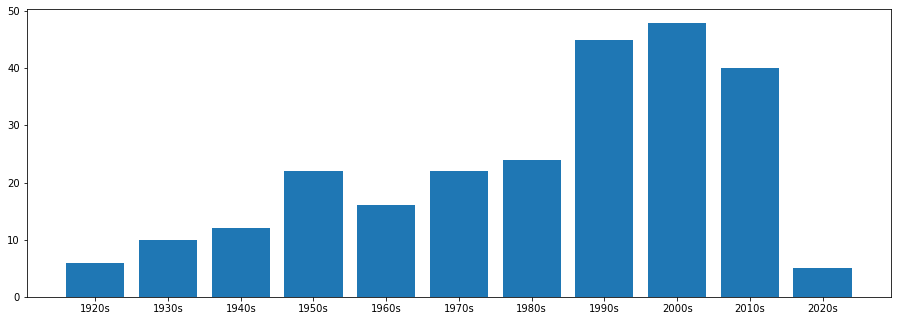

In [752]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(list_of_unique_decades_improved,number_of_movies_per_decade)
plt.show()

#fig, ax = plt.subplots()
#ax.pie(number_of_movies_per_decade, labels=list_of_unique_decades)

In [654]:
def get_list_of_unique_genres(genres):
    list_genres = []
    for i in genres:
        for j in i:
            list_genres.append(j)
    list_of_unique_genres = get_list_of_unique_elements(list_genres)
    return list_of_unique_genres

In [604]:
number_of_genre_appearances = get_number_of_appearances(list_genres, list_of_unique_genres)
print(list_of_genre_appearances)

[176, 51, 52, 27, 9, 61, 7, 24, 23, 20, 14, 32, 13, 31, 23, 46, 4, 5, 4, 1, 5]


In [663]:
# This function sorts the genres by popularity
def sort_genres_by_appearances(list_of_unique_genres, number_of_genre_appearances):
    list_of_genres_and_appearances = []
    for i in range(len(list_of_unique_genres)):
        temp_list = []
        temp_list.append(number_of_genre_appearances[i])
        temp_list.append(list_of_unique_genres[i])
        list_of_genres_and_appearances.append(temp_list)
    list_of_genres_and_appearances.sort(reverse=True)
    list_genres_sorted = []
    list_genres_appearances_sorted = []
    for i in range(len(list_of_genres_and_appearances)):
        list_genres_sorted.append(list_of_genres_and_appearances[i][1])
    for i in range(len(list_of_genres_and_appearances)):
        list_genres_appearances_sorted.append(list_of_genres_and_appearances[i][0])
    return list_genres_sorted, list_genres_appearances_sorted

In [664]:
list_genres_sorted, list_genres_appearances_sorted = sort_genres_by_appearances(list_of_unique_genres, number_of_genre_appearances)

Here we can see that the genre 'Drama' is by far the most popular, followed by 'Adventure', 'Action', 'Crime', 'Comedy' and so on.

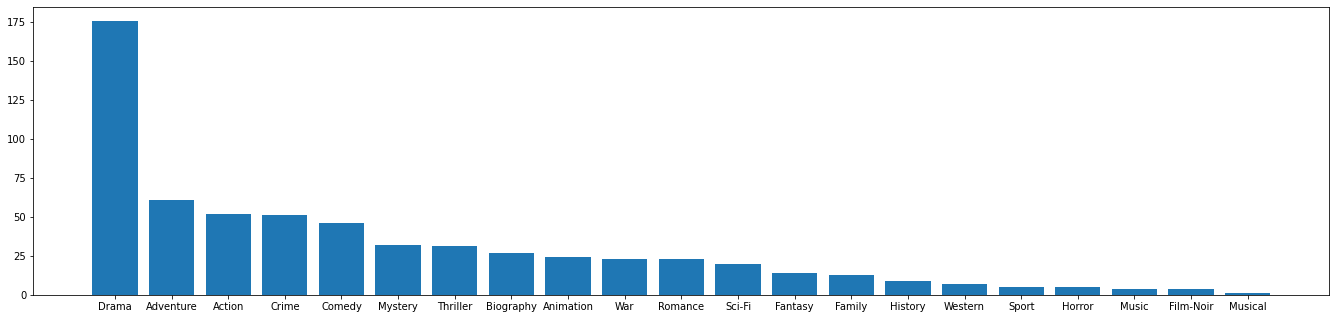

In [665]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(list_genres_sorted,list_genres_appearances_sorted)
plt.show()

In [658]:
def get_durations(duration):
    list_of_movie_durations = []
    for i in duration:
        list_of_movie_durations.append(i)
    return list_of_movie_durations

In [659]:
list_of_movie_durations = get_durations(complete_movie_df['duration'])

Using this density plot and box plot, we can see what is the prefered length for a movie, with the big majority being between 1h40m and 2h25m.

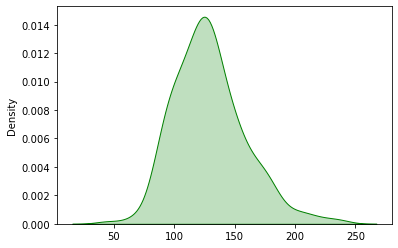

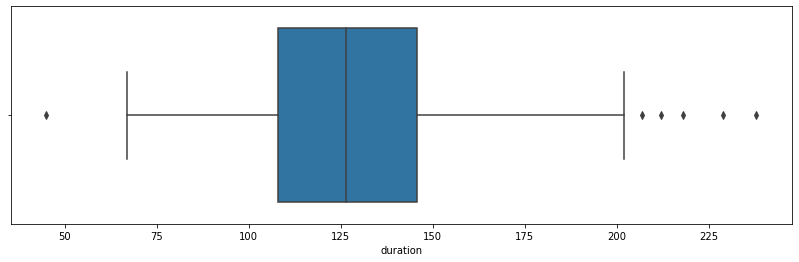

In [677]:
# Density plot
res = sn.kdeplot(list_of_movie_durations,color='green',shade=True)
plt.show()

# Box plot
plt.figure(figsize=(14, 4))
sn.boxplot(x=complete_movie_df['duration'])
plt.show()

In [678]:
# Get a list of the most influential actors by checking who has appeared in 5 movies or more on this list
def get_significant_actors(actors):
    all_actors = []
    significant_actors = []
    for i in actors:
        for j in i:
            all_actors.append(j)
    for actor in all_actors:
        if all_actors.count(actor) > 4 and actor not in significant_actors:
            significant_actors.append(actor)
    return significant_actors

In [679]:
significant_actors = get_significant_actors(complete_movie_df['actors'])
print(significant_actors)

['Morgan Freeman', 'Christian Bale', 'Robert De Niro', 'Clint Eastwood', 'Tom Hanks', 'Brad Pitt', 'Leonardo DiCaprio', 'Harrison Ford', 'Takashi Shimura', 'Charles Chaplin', 'John Ratzenberger', 'Mark Ruffalo']


# Sorting

A quick functions which sorts the list of movies based on any column available in the table. Here we can easily sort movies based on the release date, duration or number of votes.

In [510]:
def sort_by():
    print("Sort by one of the following criteria: title, rating, year, votes, duration")
    criteria = input("Sort by:")
    sorted_df = complete_movie_df.sort_values(by=[criteria])
    return sorted_df

In [708]:
sort_by()

Sort by one of the following criteria: title, rating, year, votes, duration
Sort by:year


,rank,title,rating,year,url,description,genre,votes,duration,director,writer,actors
128,129,The Kid,8.2,1921,https://imdb.com/title/tt0012349/,"The Tramp cares for an abandoned child, but ev...","[Comedy, Drama, Family]",130000,68,Charles Chaplin,Charles Chaplin,"[Charles Chaplin, Edna Purviance, Jackie Cooga..."
196,197,Sherlock Jr.,8.1,1924,https://imdb.com/title/tt0015324/,"A film projectionist longs to be a detective, ...","[Action, Comedy, Romance]",53000,45,Buster Keaton,Jean C. Havez,"[Buster Keaton, Kathryn McGuire, Joe Keaton, E..."
177,178,The Gold Rush,8.1,1925,https://imdb.com/title/tt0015864/,A prospector goes to the Klondike during the 1...,"[Adventure, Comedy, Drama]",114000,95,Charles Chaplin,Charles Chaplin,"[Charles Chaplin, Mack Swain, Tom Murray, Henr..."
188,189,The General,8.1,1926,https://imdb.com/title/tt0017925/,After being rejected by the Confederate milita...,"[Action, Adventure, Comedy]",94000,67,Clyde Bruckman,Buster Keaton,"[Buster Keaton, Marion Mack, Glen Cavender, Ji..."
114,115,Metropolis,8.2,1927,https://imdb.com/title/tt0017136/,In a futuristic city sharply divided between t...,"[Drama, Sci-Fi]",179000,153,Fritz Lang,Thea von Harbou,"[Brigitte Helm, Alfred Abel, Gustav Fröhlich, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,Jai Bhim,8.0,2021,https://imdb.com/title/tt15097216/,When a tribal man is arrested for a case of al...,"[Crime, Drama, Mystery]",207000,164,T.J. Gnanavel,T.J. Gnanavel,"[Suriya, Lijo Mol Jose, Manikandan K., Rajisha..."
154,155,Spider-Man: No Way Home,8.1,2021,https://imdb.com/title/tt10872600/,"With Spider-Man's identity now revealed, Peter...","[Action, Adventure, Fantasy]",803000,148,Jon Watts,Chris McKenna,"[Tom Holland, Zendaya, Benedict Cumberbatch, J..."
125,126,Top Gun: Maverick,8.2,2022,https://imdb.com/title/tt1745960/,"After thirty years, Maverick is still pushing ...","[Action, Drama]",596000,130,Joseph Kosinski,Jim Cash,"[Tom Cruise, Jennifer Connelly, Miles Teller, ..."
10,11,Spider-Man: Across the Spider-Verse,8.8,2023,https://imdb.com/title/tt9362722/,"Miles Morales catapults across the Multiverse,...","[Animation, Action, Adventure]",123000,140,Joaquim Dos Santos,Kemp Powers,"[Shameik Moore, Hailee Steinfeld, Brian Tyree ..."


# Conclusions and Future Work

## Summary
In this project we have scraped the information of the Top 250 most popular movies in history and analysed it.

For this, we have used BeautifulSoup for Web Scraping, matplotlib and Seaborn for data visualisation and Pandas to create DataFrames which are easy to read and sort.

As a result, we have drawn conclusions such as:
- What are the most popular genres
- What is the prefered duration of a movie 
- Which decades had produced the largest number of influential movies
- What are the actors that played the most numerous roles in top movies

We have also created a quick way to sort these movies based on any parameter that we scraped, useful if you want to find the shortest movie, most popular (by the number of votes), newest or oldest, or which one includes my favourite actors.

# Future Works
This project can be extended further by creating a sorting algorithm which takes into consideration more parameters at the same time. For example, I want to watch the newest shortest movies (this needs to sort based on 'year' as well as 'duration').